# 1. Import lib


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option("display.float_format", "{:.1f}".format)

# Add data


In [15]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [5]:
df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [6]:
df.isnull().sum()

name               0
genres             0
type               0
rating           244
no_of_votes      244
meta_score      4348
release_date      58
gross           4461
budget          4887
countries         36
url                0
ROI             5140
result             0
dtype: int64

In [7]:
df.dtypes

name             object
genres           object
type             object
rating          float64
no_of_votes     float64
meta_score      float64
release_date    float64
gross           float64
budget          float64
countries        object
url              object
ROI             float64
result           object
dtype: object

Điều kiện để dánh giá phim tốt <br>
rating > 7.5 <br>
meta_score > 72 <br>

# 2. Phân tích data theo địa lý và quốc gia sản xuất (Phần 3)
Mục tiêu: 
- Kiểm tra các mối tương quan giữa các features
- Kiểm tra xem có thể dữ đoán rating dựa vào quốc gia ko, hoặc quốc gia + thể loại + năm.

In [16]:
encoded_file_path = "movies_data_encoded.csv"

In [17]:
df_encoded = pd.read_csv(encoded_file_path)
df_encoded.head()

,release_date,rating,type_encoded,gross,Australia,Belgium,Brazil,Bulgaria,Canada,China,...,Sweden,Switzerland,Taiwan,Thailand,United Arab Emirates,United Kingdom,United States,West Germany,gross_log,gross_scaled
0,1995.0,6.5,0.0,18636537.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,16.7,-0.2
1,2022.0,7.8,0.0,481757663.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,20.0,0.9
2,1997.0,7.6,0.0,263920180.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,19.4,0.7
3,1978.0,7.4,0.0,300478449.0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,19.5,0.7
4,2024.0,6.3,0.0,185900759.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,19.0,0.6


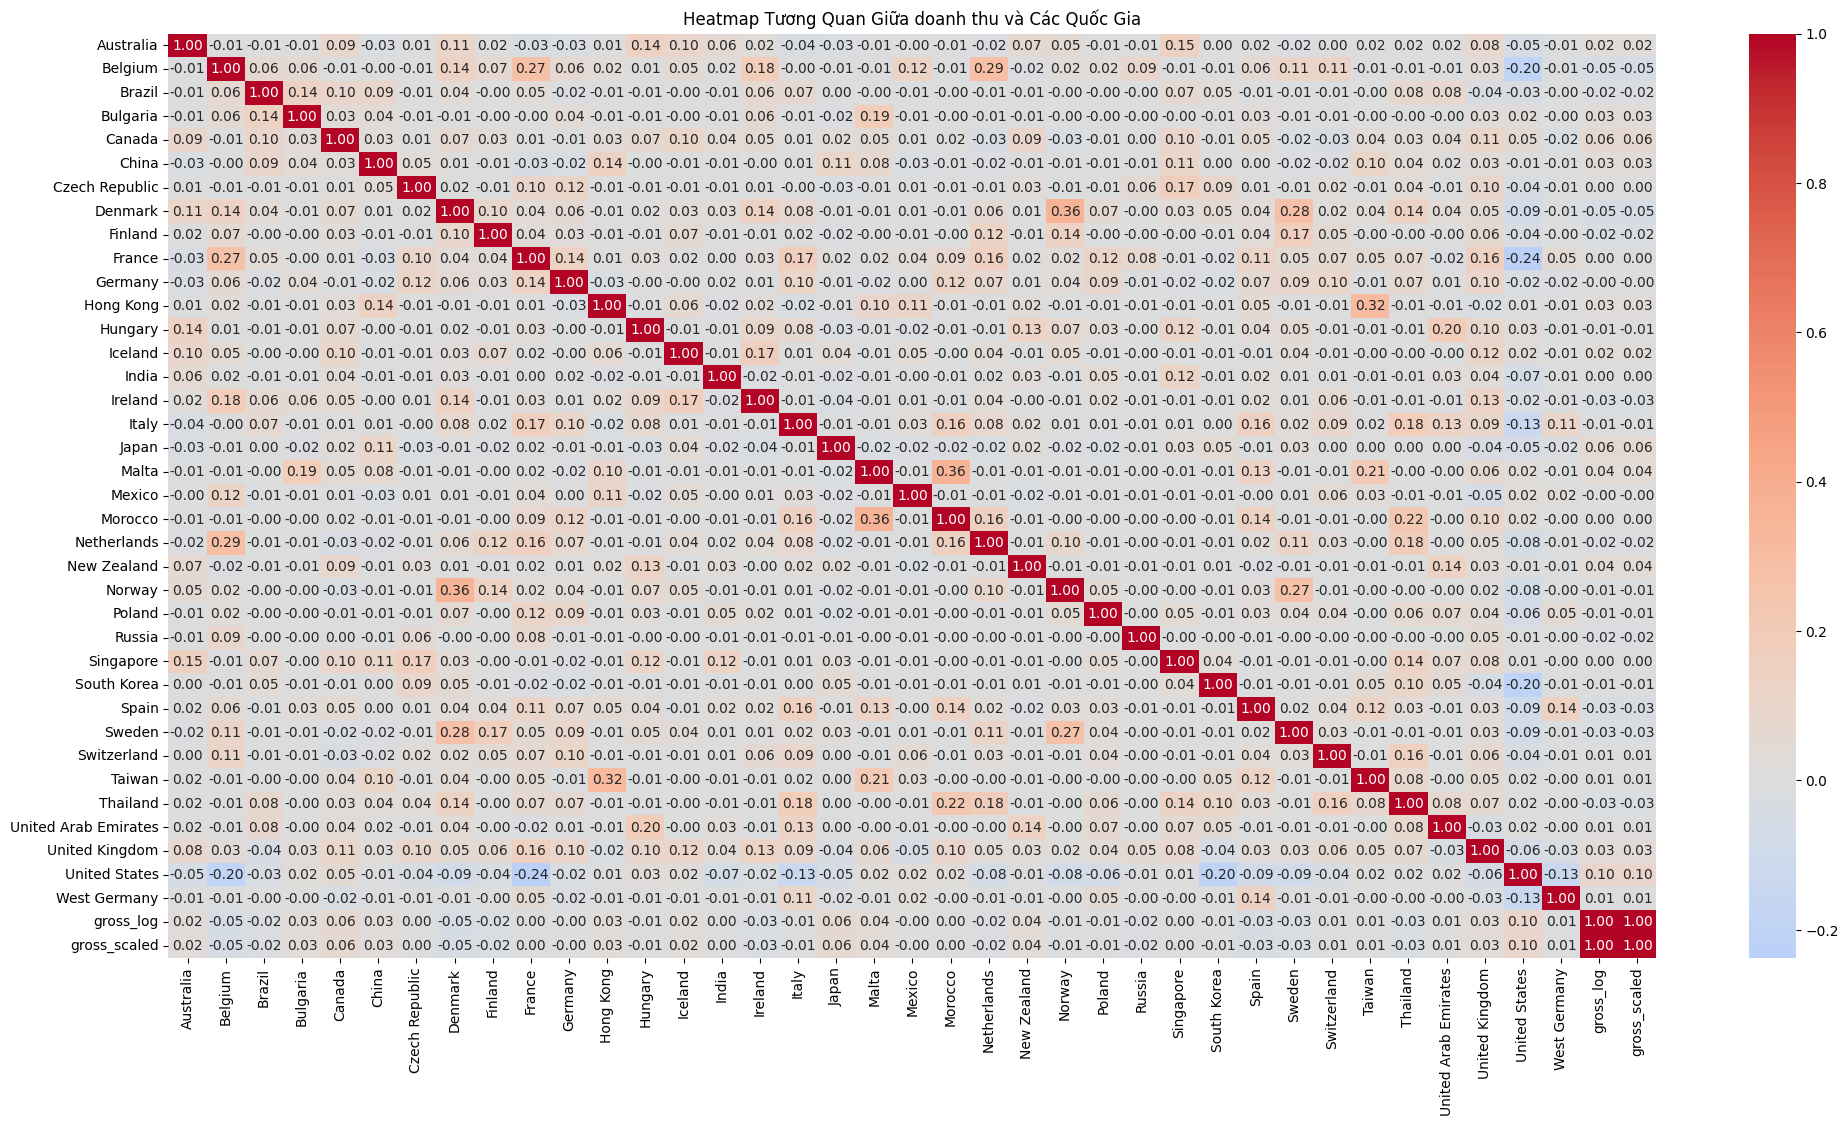

In [18]:
# Lọc chỉ các cột liên quan đến countries và rating
selected_corr = df_encoded.drop(columns = ['rating', 'gross', 'release_date', 'type_encoded']).corr()

# Vẽ heatmap tương quan chỉ với các quốc gia
plt.figure(figsize=(24, 12))
sns.heatmap(selected_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap Tương Quan Giữa doanh thu và Các Quốc Gia")
plt.show()

- Tương quan thấp giữa doanh thu và các quốc gia

    Cột gross_scaled có giá trị tương quan thấp với tất cả các quốc gia, cho thấy không có quốc gia nào đóng vai trò chi phối tuyệt đối doanh thu tổng thể.

- Mối tương quan âm đáng chú ý

    countries_United States có tương quan âm với countries_United Kingdom (-0.59), countries_France (-0.34), countries_Japan (-0.30), và countries_China (-0.20).

    Điều này có thể phản ánh việc khi doanh thu tăng ở một số quốc gia khác thì có xu hướng giảm nhẹ ở Hoa Kỳ, có thể do cạnh tranh giữa các thị trường.

- Tương quan giữa các quốc gia khá thấp

    Không có cặp quốc gia nào có mức tương quan cao đáng kể, cho thấy doanh thu phim ở mỗi quốc gia có thể hoạt động tương đối độc lập, không bị ảnh hưởng nhiều bởi các thị trường khác.

### Giảm chiều dữ liệu với t-SNE để trực quan hóa

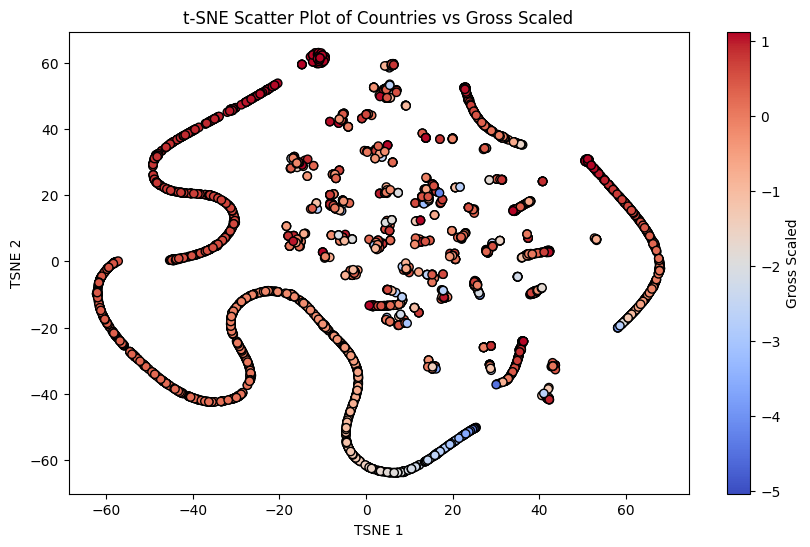

In [19]:
# Lấy dữ liệu chỉ chứa One-Hot Encoding của quốc gia và cột release_date
country_features = df_encoded.drop(columns = ['gross', 'gross_scaled', 'type_encoded', 'release_date', 'rating']) #pd.concat([df_encoded[country_columns], df_encoded["release_date"], df_encoded["type_encoded"]], axis=1)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
country_features_scaled = scaler.fit_transform(country_features)

# Áp dụng t-SNE sau khi đã giảm chiều bằng PCA
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
country_tsne = tsne.fit_transform(country_features_scaled)

# Chuyển thành DataFrame để trực quan hóa
df_tsne = pd.DataFrame(country_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["gross_scaled"] = df_encoded["gross_scaled"]

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne["TSNE1"], df_tsne["TSNE2"], c=df_tsne["gross_scaled"], cmap="coolwarm", edgecolor="k")
plt.colorbar(scatter, label="Gross Scaled")
plt.title("t-SNE Scatter Plot of Countries vs Gross Scaled")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

- Nhận xét chung:<br>
    Biểu đồ thể hiện sự phân tán của các quốc gia, cho thấy cách các bộ phim nhóm lại dựa trên quốc gia gốc của chúng, với màu sắc biểu thị hiệu suất phòng vé của chúng. <br>
    Các cụm điểm xuất hiện gần nhau đại diện cho các bộ phim từ các quốc gia tương tự hoặc các quốc gia có sự liên kết cùng làm 1 bộ phim.<br>

- Nhận xét các phân cụm:<br>
    Phân cụm không đồng đều: Các điểm dữ liệu (phim) tạo thành nhiều cụm với mật độ khác nhau, cho thấy phim từ một số quốc gia hoặc nhóm quốc gia cụ thể có xu hướng tập trung với nhau.<br>
    Cấu trúc phức tạp: Sự hiện diện của nhiều cụm và một số điểm nằm rải rác cho thấy mối quan hệ giữa quốc gia và doanh thu không đơn giản, có nhiều yếu tố ảnh hưởng.<br>
    Các điểm ở vùng chuyển tiếp: Có thể là các phim hợp tác quốc tế, nơi nhiều quốc gia cùng tham gia sản xuất. <br>

- Phân tích các đường nối dài:<br>
    Phim đa quốc gia: Các điểm nằm trên đường nối dài đại diện cho phim có sự tham gia của nhiều quốc gia.<br>
    Có sự thay đổi doanh thu về sự hợp tác giữa các quốc gia.<br>
    
-  Phân bố màu sắc:<br>
    Gradient màu không đồng nhất: Màu sắc (đại diện cho doanh thu) phân bố không đồng đều giữa các cụm, với một số cụm có màu xanh (doanh thu thấp) và một số có màu đỏ (doanh thu cao).<br>
    Phân tách doanh thu theo cụm: Có những cụm rõ ràng với màu sắc khá đồng nhất (toàn màu đỏ hoặc toàn màu xanh), chứng tỏ một số nhóm quốc gia có khuynh hướng tạo ra phim với doanh thu tương tự nhau.<br>


#### Tách riêng phim theo quốc gia và phim kết hợp nhiều quốc gia
- Sử dụng cách tính vecto khoảng cách giữa các quốc gia trong không gian: các phim có khoảng cách nhỏ sẽ ít có ssuwj kết hợp hơn.<br>
- Nét mờ: phim đơn quốc gia. <br>
- Nét đậm: phim có sự hợp tác liên quốc gia. <br>

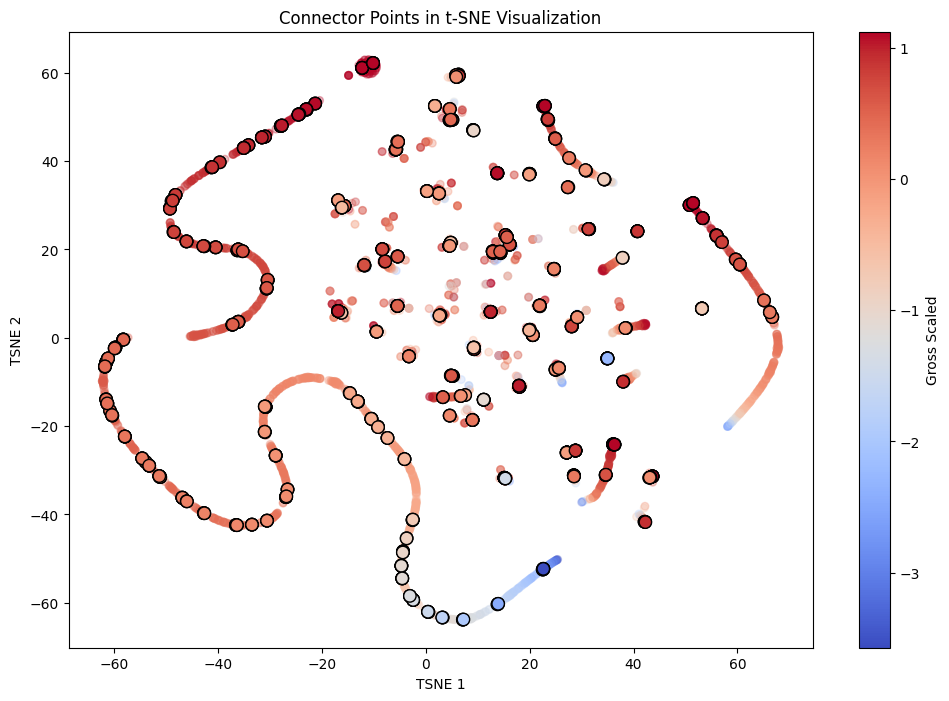

In [ ]:
# Không cần mô hình mới, chỉ sử dụng kết quả t-SNE hiện có
# Thêm thông tin khoảng cách tới điểm gần nhất để xác định điểm trên đường nối

from scipy.spatial.distance import cdist
import numpy as np

# Tính toán ma trận khoảng cách
tsne_coords = df_tsne[["TSNE1", "TSNE2"]].values
distances = cdist(tsne_coords, tsne_coords, metric='euclidean')

# Tìm khoảng cách tới điểm gần nhất (bỏ qua chính nó - khoảng cách = 0)
k_nearest = 5  # Số điểm gần nhất để xem xét
nearest_distances = []

for i in range(len(distances)):
    # Sắp xếp khoảng cách và lấy k điểm gần nhất (bỏ qua chính nó)
    sorted_distances = np.sort(distances[i])[1:k_nearest+1]
    avg_distance = np.mean(sorted_distances)
    nearest_distances.append(avg_distance)

df_tsne['avg_neighbor_distance'] = nearest_distances

# Các điểm trên đường nối thường có khoảng cách trung bình nhỏ hơn
# so với các điểm ở trung tâm cụm
threshold = np.percentile(nearest_distances, 25)  # Ngưỡng dưới 
connector_points = df_tsne[df_tsne['avg_neighbor_distance'] < threshold].copy()

# Hiển thị điểm trên đường nối
plt.figure(figsize=(12, 8))
# Vẽ tất cả các điểm với độ mờ cao
plt.scatter(df_tsne["TSNE1"], df_tsne["TSNE2"], c=df_tsne["gross_scaled"], 
            cmap="coolwarm", alpha=0.3, s=30)
# Đánh dấu điểm trên đường nối
plt.scatter(connector_points["TSNE1"], connector_points["TSNE2"], 
            c=connector_points["gross_scaled"], cmap="coolwarm", 
            edgecolor="k", s=80, alpha=1)
plt.colorbar(label="Gross Scaled")
plt.title("Connector Points in t-SNE Visualization")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

- Phân tích các đường nối dài:<br>
    Các phim đơn quốc gia có doanh thu thấp thì khi kết hợp vẫn ko giúp doanh thu thay đổi nhiều. <br>
    Điểm nối cung cấp thông tin quan trọng về cách các quốc gia hợp tác ảnh hưởng đến doanh thu. <br>
    Sự hiện diện của các cụm và đường nối có màu sắc khác nhau xác nhận rằng đặc trưng quốc gia chứa thông tin có giá trị về doanh thu. <br>
    Tồn tại những đường nối(Sự hợp tác) giúp gia tăng doanh thu một cách đang kể. <br>



### Kết luận:
- Quốc gia và sự hợp tác giữa các quốc gia có ảnh hưởng lớn đến doanh thu.<br>
- Các biểu đồ t-SNE cho thấy đặc trưng quốc gia mang thông tin có giá trị về doanh thu tiềm năng, do đó nên được giữ lại trong mô hình dự đoán.<br>
- Tương tác giữa các quốc gia: Hiệu ứng của việc hợp tác giữa các quốc gia không đơn thuần là tổng các tác động riêng lẻ. Mô hình cần nắm bắt được các tương tác này, có thể thông qua các đặc trưng tương tác hoặc mô hình có khả năng học các mối quan hệ phức tạp.<br>

<Axes: xlabel='gross_scaled', ylabel='Count'>

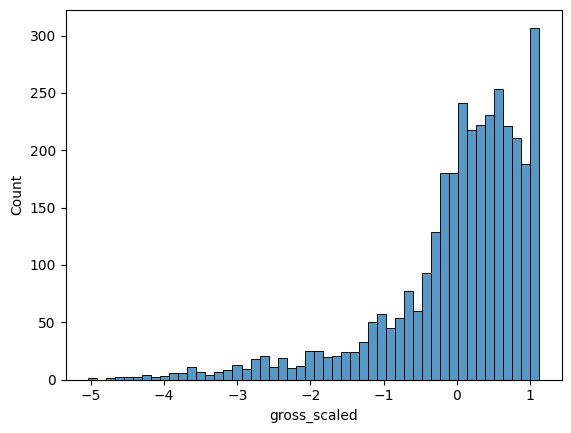

In [20]:
sns.histplot(df_encoded["gross_scaled"], bins=50)